In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.classifier import discrimination_threshold
from yellowbrick.classifier import confusion_matrix


In [38]:
data = pd.read_csv('../10-Data/credit-card-fraud-data.zip')

In [39]:
data = data.set_index('Time')

In [40]:
data['logAmount'] = np.log1p(data.Amount)
data = data.drop(columns={'Amount'})

In [41]:
Xtrn, Xtst, ytrn, ytst = train_test_split(data.loc[:,data.columns != 'Class'], 
                                          data.Class, 
                                          test_size=0.50, 
                                          random_state=42)

In [42]:
lerner = LogisticRegression()

In [43]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', lerner)])

In [46]:
pipe.fit(Xtrn, ytrn)
yhat = pipe.predict(Xtst)

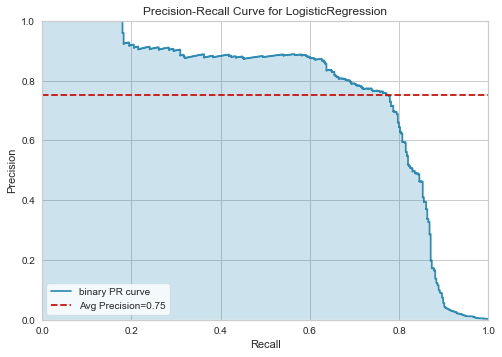

PrecisionRecallCurve(ap_score=True,
                     ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000022B6BEC3240>,
                     classes=None, encoder=None, fill_area=True,
                     fill_opacity=0.2, force_model=False, is_fitted='auto',
                     iso_f1_curves=False, iso_f1_values={0.2, 0.4, 0.6, 0.8},
                     line_opacity=0.8, micro=True, model=None, per_class=False)

In [49]:
precision_recall_curve(lerner, Xtrn, ytrn);

In [55]:
print(classification_report(ytst, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.59      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962



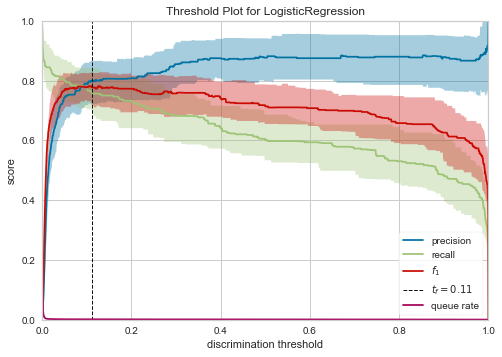

In [56]:
discrimination_threshold(lerner, Xtrn, ytrn);

In [ ]:
confusion_matrix(lerner, Xtrn, ytrn,);